In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = 50

In [2]:
imp = pd.read_excel('input/data.xlsx', sheet_name='importance', index_col=0)
per = pd.read_excel('input/data.xlsx', sheet_name='performance', index_col=0)
print(imp.shape, per.shape)

(101, 68) (101, 68)


In [3]:
imp.head()

,S01,S02,S03,S04,S05,S06,S06-2,S06-3,S07,S08,S09,S10,S11,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,A11,A12,...,C03,C04,C05,C06,C07,C08,C09,C10,D01,D02,D03,D04,D05,D06,D07,D08,E01,E02,E03,E04,E05,E06,E07,E08,E09
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1.0,78.0,2.0,3,NaN,NaN,1,4,1.0,4,2,5.0,5.0,5.0,5.0,5.0,3.0,3,3,3,4,3,3,...,3,3.0,4.0,3.0,3,3,3.0,3,3,3,3,3.000,5,3,3,3,3.0,3.0,3.00,3.00,4,3,3.0,3.0,3.0
2,1,"2,3",2.0,120.0,3.0,3,NaN,NaN,1,4,1.0,"1,2,3,4",2,4.0,5.0,3.0,4.0,4.0,3.0,3,4,3,3,4,4,...,4,3.0,5.0,5.0,5,4,4.0,4,5,4,4,4.000,4,4,4,4,4.0,4.0,4.00,3.00,4,3,3.0,2.0,3.0
3,1,1,1.0,167.0,2.0,1,2020.0,2014.0,1,4,1.0,2,2,3.0,3.0,3.0,5.0,4.0,5.0,3,5,5,5,4,5,...,5,3.0,5.0,4.0,4,4,4.0,4,4,3,5,5.000,3,4,4,4,4.0,3.0,3.00,3.00,3,3,4.0,4.0,4.0
4,1,3,NaN,280.0,2.0,1,NaN,2013.0,1,4,1.0,4,2,5.0,4.0,4.0,4.0,5.0,4.0,3,3,4,4,5,5,...,4,5.0,4.9,4.8,5,5,5.0,4,5,3,5,4.556,5,4,4,5,5.0,4.0,4.08,4.02,4,3,1.0,1.0,1.0
5,1,"1,2,3",1.0,2930.0,3.0,2,NaN,2002.0,1,4,4.0,2,2,5.0,5.0,5.0,5.0,5.0,5.0,5,5,4,4,5,5,...,5,5.0,5.0,5.0,5,5,5.0,5,5,4,5,5.000,5,5,5,5,5.0,5.0,5.00,5.00,5,5,3.0,2.0,2.0


## Paired T-Test

In [4]:
from scipy import stats

columns = imp.filter(regex='A|B|C|D|E').columns.tolist()
ttest = pd.DataFrame(index=columns, columns=['t-statistic', 'p-values'])
for col in columns:
    tmp = stats.ttest_rel(imp.loc[:,col], per.loc[:,col])
    ttest.loc[col, 't-statistic'] = tmp[0] 
    ttest.loc[col, 'p-values'] = tmp[1]

In [5]:
ttest.head(10)

,t-statistic,p-values
A01,6.42841,4.43839e-09
A02,8.07761,1.54725e-12
A03,5.41728,4.18476e-07
A04,8.59275,1.18656e-13
A05,8.26711,6.03331e-13
A06,6.74631,9.98354e-10
A07,3.4537,0.000812303
A08,6.81231,7.30169e-10
A09,5.91257,4.70687e-08
A10,6.54041,2.63166e-09


## Importance-Performance Analysis

In [6]:
imp_mean = imp.loc[:,'A01':'E09'].mean()
per_mean = per.loc[:,'A01':'E09'].mean()

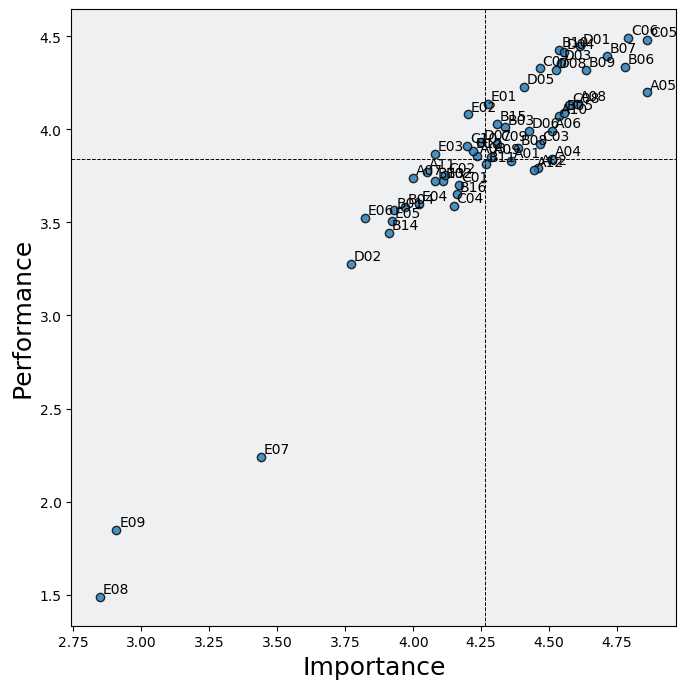

In [7]:
fig, ax = plt.subplots(figsize=(7,7), dpi=100)

ax.scatter(imp_mean, per_mean, marker='o', edgecolor='black', alpha=0.8)

for i, lb in enumerate(imp_mean.index.values):
    ax.annotate(lb, xy=(imp_mean[i], per_mean[i]), 
                xytext=(imp_mean[i]+0.01, per_mean[i]+0.02), 
                fontsize=10)

ax.axvline(imp_mean.mean(), color='black', linestyle='--', lw=0.7)
ax.axhline(per_mean.mean(), color='black', linestyle='--', lw=0.7)
ax.set_facecolor('#EFF0F1')
ax.set_xlabel('Importance', fontsize=18)
ax.set_ylabel('Performance', fontsize=18)
fig.tight_layout()
plt.show()
# fig.savefig('main_plot.png', dpi=200)

In [8]:
def plotting_ipa(x, y, labels, ax):
    ax.scatter(x, y, marker='o', edgecolor='black', alpha=0.8)

    for i, label in enumerate(labels):
        ax.annotate(label, xy=(x[i], y[i]), 
                    xytext=(x[i]+0.01, y[i]+0.005), 
                    fontsize=10)

    ax.axvline(x.mean(), color='black', linestyle='--', lw=0.7)
    ax.axhline(y.mean(), color='black', linestyle='--', lw=0.7)
    ax.set_facecolor('#EFF0F1')
    return ax

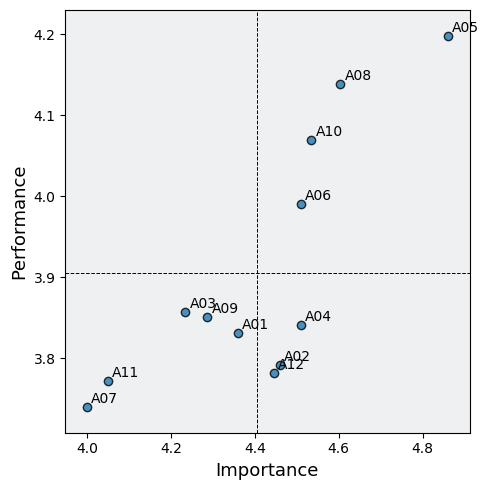

In [9]:
a_imp = imp.filter(regex='A', axis=1).mean()
a_per = per.filter(regex='A', axis=1).mean()

fig, ax = plt.subplots(figsize=(5,5), dpi=100)

plotting_ipa(a_imp, a_per, a_imp.index, ax)
ax.set_xlabel('Importance', fontsize=13)
ax.set_ylabel('Performance', fontsize=13)
fig.tight_layout()
plt.show()

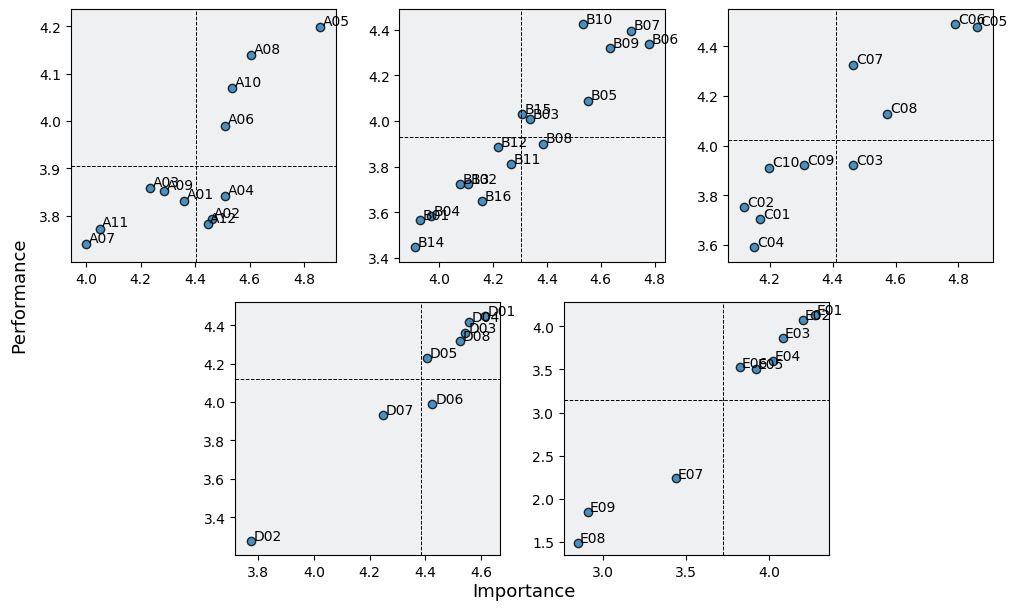

In [10]:
a_imp = imp.filter(regex='A', axis=1).mean()
a_per = per.filter(regex='A', axis=1).mean()
b_imp = imp.filter(regex='B', axis=1).mean()
b_per = per.filter(regex='B', axis=1).mean()
c_imp = imp.filter(regex='C', axis=1).mean()
c_per = per.filter(regex='C', axis=1).mean()
d_imp = imp.filter(regex='D', axis=1).mean()
d_per = per.filter(regex='D', axis=1).mean()
e_imp = imp.filter(regex='E', axis=1).mean()
e_per = per.filter(regex='E', axis=1).mean()

fig = plt.figure(figsize=(10, 6), dpi=100)
grid = plt.GridSpec(2, 6) 

a = fig.add_subplot(grid[0,:2])
b = fig.add_subplot(grid[0,2:4])
c = fig.add_subplot(grid[0,4:6])
d = fig.add_subplot(grid[1,1:3])
e = fig.add_subplot(grid[1,3:5])

plotting_ipa(a_imp, a_per, a_imp.index, a)
plotting_ipa(b_imp, b_per, b_imp.index, b)
plotting_ipa(c_imp, c_per, c_imp.index, c)
plotting_ipa(d_imp, d_per, d_imp.index, d)
plotting_ipa(e_imp, e_per, e_imp.index, e)

fig.text(0.5, 0.005, 'Importance', ha='center', va='center', fontsize=13)
fig.text(-0.005, 0.5, 'Performance', ha='center', va='center', rotation='vertical', fontsize=13)
fig.tight_layout()
plt.show()

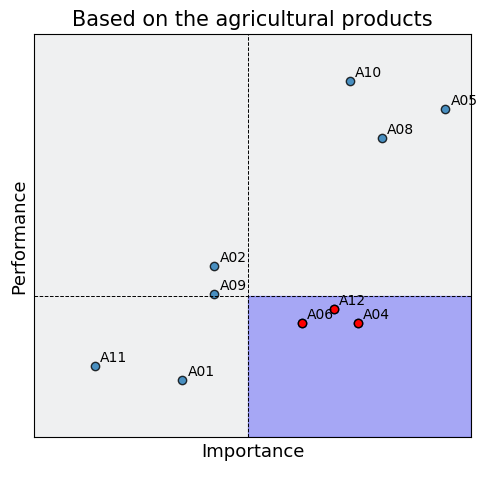

In [11]:
agricul_imp = imp[imp['S01'] == 1].filter(regex='A').mean()
agricul_per = per[per['S01'] == 1].filter(regex='A').mean()
mask = np.logical_and(agricul_imp >= agricul_imp.mean(), agricul_per <= agricul_per.mean())

fig, ax = plt.subplots(figsize=(5,5), dpi=100)

plotting_ipa(agricul_imp, agricul_per, agricul_per.index, ax)
ax.set_xlim([agricul_imp.min()+0.05, agricul_imp.max()+0.05])
ax.set_ylim([agricul_per.min()+0.05, agricul_per.max()+0.05])
plt.fill_between([agricul_imp.mean(), ax.get_xlim()[1]], 
                 agricul_per.mean(), ax.get_ylim()[0], color='b', alpha=0.3)

ax.scatter(agricul_imp[mask], agricul_per[mask], c='r', 
           edgecolor='black', zorder=1)

ax.set_title('Based on the agricultural products', fontsize=15)
ax.set_xlabel('Importance', fontsize=13)
ax.set_ylabel('Performance', fontsize=13)
ax.tick_params(axis='both', left=False, labelleft=False, 
               bottom=False, labelbottom=False)
fig.tight_layout()
plt.show()